**Data Analysis and Visualization Lab - Final Exam - Fall 2023** <br>
Please note:
- Total marks are **45**. The allowed time is **3 hour** including submission time
- No internet or helping material/cheat sheet is allowed.
- You can use Google colab (if Jupyter is not installed on your system )
- Please submit your code on **Google Classroom** as well as on **Cactus** on following path in your desired section.
   
   **E:\Xeon\Xeon\Fall 2023\Rida Mahmood\DAV-LAB-Submissions-Fall'23\Your-Section**

- Add Your Roll_Number in this format 21L-XXXX as filename and download the .ipynb file, submit Only python notebook file. No File link sharing is allowed. No **PDF/ZIP** will be acceptable.
- Each question of 4 is compulsory to solve and contains amrks.
-Replace the **'None'** and **'###'**in this notebook.



Roll # 21L-5613

# **QUESTION 01** : [10 Marks]


##Image Cross-Correlation for Common Features
Write a function that takes two grayscale images and performs cross-correlation to find common features between them. Implement a sliding window approach to identify regions where the patterns in both images are similar.
Your function should handle following checks:


1.  Images of different sizes.
2. Use a sliding window to compute the cross-correlation score between corresponding patches of the images. Where window size is = 4x4
3. Handle edge cases when the sliding window goes beyond the image boundaries.
4. Output a new image highlighting regions with high cross-correlation.

    
Steps:
1. Convert image into grayscale if color.
2. Calculate the correlation map
3. Find the location of maximum correlation
4. Draw a rectangle around the matched region

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

def find_common_features(image1, image2, window_size=(4, 4)):
    if len(image1.shape) == 3:
        image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    if len(image2.shape) == 3:
        image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    y, x = np.index(shape)

    image_out = cv2.cvtColor(image2, cv2.COLOR_GRAY2BGR)
    cv2.rectangle(image_out, (x, y), (x, y, (0, 0, 255), 2))

    return image_out

In [ ]:
image1 = cv2.imread('we.png')
image2 = cv2.imread('ew.png')

find_common_features(image1,image2)



# **Question 2: Text Processing and Analysis on Airline Reviews**  [17 Marks]

**A. Data Preparation** [3 Marks]

1. Load the dataset and isolate the 'ReviewBody' column for analysis.
2. Convert the 'Datetime' column to a Python datetime object for better date-time manipulation. 1 mark
3. Investigate the 'VerifiedReview' column and convert it into a numerical format (e.g., 1 for True, 0 for False). 1 mark
 Check for any other columns that might need type conversion for better analysis


In [ ]:
pip install demoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.3 MB/s eta 0:00:00


In [ ]:
import demoji
import re

In [ ]:
### Write Your Code Here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

data = pd.read_csv("BA_AirlineReviews.csv")
data.head()

,Unnamed: 0,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,1.0,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,1,3.0,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,November 2023,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,2,8.0,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,November 2023,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,3,1.0,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,December 2022,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,4,1.0,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,November 2023,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0


In [ ]:
# Isolate the 'ReviewBody' column
review_body = data['ReviewBody']

In [ ]:
# Convert the 'Datetime' column to a Python datetime object
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Convert 'VerifiedReview' to numerical format
data['VerifiedReview'] = data['VerifiedReview'].map({True: 1, False: 0})

In [ ]:
data.head()

,Unnamed: 0,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,1.0,"""Service level far worse then Ryanair""",L Keele,2023-11-19,1,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,1,3.0,"""do not upgrade members based on status""",Austin Jones,2023-11-19,1,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,November 2023,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,2,8.0,"""Flight was smooth and quick""",M A Collie,2023-11-16,0,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,November 2023,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,3,1.0,"""Absolutely hopeless airline""",Nigel Dean,2023-11-16,1,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,December 2022,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,4,1.0,"""Customer Service is non existent""",Gaylynne Simpson,2023-11-14,0,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,November 2023,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0


In [ ]:
data.head()

,Unnamed: 0,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,1.0,"""Service level far worse then Ryanair""",L Keele,19th November 2023,NaN,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,1,3.0,"""do not upgrade members based on status""",Austin Jones,19th November 2023,NaN,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,November 2023,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,2,8.0,"""Flight was smooth and quick""",M A Collie,16th November 2023,NaN,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,November 2023,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,3,1.0,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,NaN,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,December 2022,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,4,1.0,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,NaN,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,November 2023,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0


**B. Advanced Data Handling** [3 Marks ]
1. Access the 'ReviewBody' column. Perform text cleaning to remove any URLs and emojis present in the reviews.
2. Implement a function to calculate the length of each review in words and add it as a new column 'ReviewLength'.
3. Create a new column 'MonthFlown' extracted from the 'DateFlown' column to analyze the reviews based on the month in which the flight was taken.

In [ ]:
### Write Your Code Here
data.drop_duplicates(subset=['ReviewBody'], keep='first', inplace=True)
data.dropna(subset=['ReviewBody'], inplace=True)

def clean_text(text):
    text = re.sub(r'[^A-Za-z ]+', ' ', text)
    text = ' '.join(text.split())
    return text

data['cleaned_ReviewBody'] = data['ReviewBody'].apply(clean_text)

print("Review Body")
print(data['ReviewBody'].head())
print()
print("Cleaned ReviewBody Text")
print(data['cleaned_ReviewBody'].head())

Review Body
0    4 Hours before takeoff we received a Mail stat...
1    I recently had a delay on British Airways from...
2    Boarded on time, but it took ages to get to th...
3    5 days before the flight, we were advised by B...
4    We traveled to Lisbon for our dream vacation, ...
Name: ReviewBody, dtype: object

Cleaned ReviewBody Text
0    Hours before takeoff we received a Mail statin...
1    I recently had a delay on British Airways from...
2    Boarded on time but it took ages to get to the...
3    days before the flight we were advised by BA t...
4    We traveled to Lisbon for our dream vacation a...
Name: cleaned_ReviewBody, dtype: object


In [ ]:
def remove_emojis(text):
    return demoji.replace(text, '')

data['cleaned_ReviewBody'] = data['cleaned_ReviewBody'].apply(remove_emojis)

for i in range(5):
    print("Review Body with Emojis Removed:", data['cleaned_ReviewBody'][i])

Review Body with Emojis Removed: Hours before takeoff we received a Mail stating a cryptic message that there are disruptions to be expected as there is a limit on how many planes can leave at the same time So did the capacity of the Heathrow Airport really hit British Airways by surprise h before departure Anyhow we took the one hour delay so what but then we have been forced to check in our Hand luggage I travel only with hand luggage to avoid waiting for the ultra slow processing of the checked in luggage Overall h later at home than planed with really no reason just due to incompetent people Service level far worse then Ryanair and triple the price Really never again Thanks for nothing
Review Body with Emojis Removed: I recently had a delay on British Airways from BRU to LHR that was due to staff shortages They announced that there was a hour holding delay but they would board us immediately in hopes of clearing the gate and leaving early We had to wait the full hours inside the ai

In [ ]:
data['ReviewLength'] = data['ReviewBody'].apply(lambda x: len(x.split()))

data['MonthFlown'] = pd.to_datetime(data['DateFlown']).dt.month

data.head()

,Unnamed: 0,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,...,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity,cleaned_ReviewBody,ReviewLength,MonthFlown
0,0,1.0,"""Service level far worse then Ryanair""",L Keele,2023-11-19,1,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,...,1.0,1.0,no,NaN,NaN,NaN,NaN,Hours before takeoff we received a Mail statin...,125,11.0
1,1,3.0,"""do not upgrade members based on status""",Austin Jones,2023-11-19,1,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,...,1.0,2.0,no,A320,1.0,2.0,2.0,I recently had a delay on British Airways from...,206,11.0
2,2,8.0,"""Flight was smooth and quick""",M A Collie,2023-11-16,0,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,...,4.0,3.0,yes,A320,4.0,NaN,NaN,Boarded on time but it took ages to get to the...,54,11.0
3,3,1.0,"""Absolutely hopeless airline""",Nigel Dean,2023-11-16,1,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,...,1.0,1.0,no,NaN,NaN,NaN,NaN,days before the flight we were advised by BA t...,255,12.0
4,4,1.0,"""Customer Service is non existent""",Gaylynne Simpson,2023-11-14,0,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,...,1.0,1.0,no,NaN,1.0,1.0,1.0,We traveled to Lisbon for our dream vacation a...,172,11.0


**C. Data Visualization and Analysis** [6 Marks (2+2+2)]


1. Analyze the distribution of 'OverallRating' and visualize it using an appropriate plot.
2. Investigate the relationship between 'SeatComfort', 'CabinStaffService', 'GroundService', 'ValueForMoney', and the 'OverallRating'. Use correlation analysis and visualize these relationships using Line/Bar Plot.
3. Perform a comparative analysis of 'VerifiedReview' against 'OverallRating' to see if verified reviews tend to be more positive or negative compared to non-verified ones. Plot this by using best described plot of your choice.

<Axes: xlabel='OverallRating', ylabel='Count'>

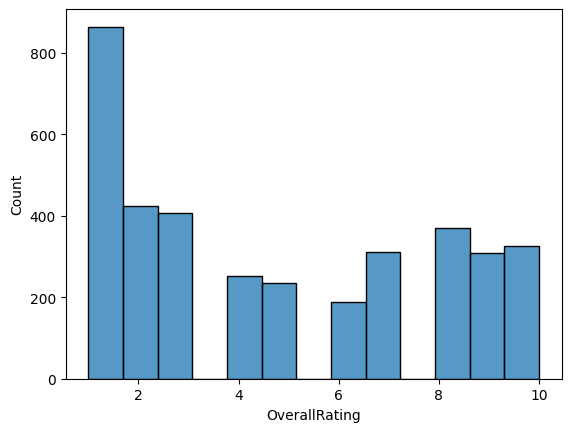

In [ ]:
sns.histplot(data['OverallRating'])

<Axes: >

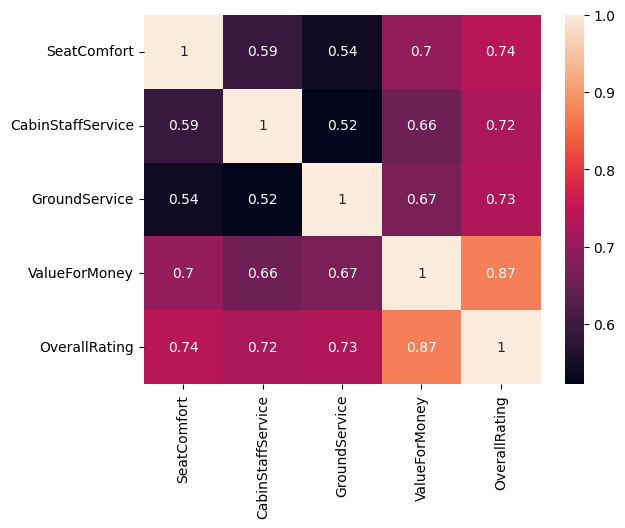

In [ ]:
corr_matrix = data[['SeatComfort', 'CabinStaffService', 'GroundService', 'ValueForMoney', 'OverallRating']].corr()
sns.heatmap(corr_matrix, annot=True)

<Axes: >

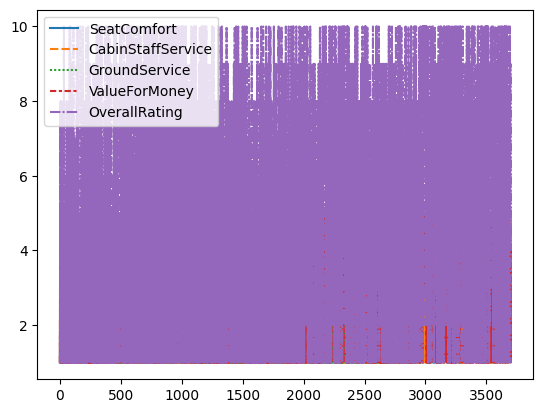

In [ ]:
sns.lineplot(data=data[['SeatComfort', 'CabinStaffService', 'GroundService', 'ValueForMoney', 'OverallRating']])

<Axes: >

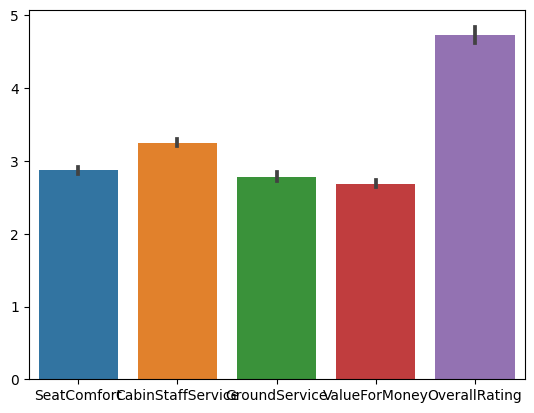

In [ ]:
sns.barplot(data=data[['SeatComfort', 'CabinStaffService', 'GroundService', 'ValueForMoney', 'OverallRating']])

**D. TF-IDF Calculation Function** [5 Marks]

Write a function to calculate the Term Frequency-Inverse Document Frequency (TF-IDF) score for each word in the reviews. This function should:
1. Calculate the term frequency (TF) for each word in a review.   
2. Calculate the inverse document frequency (IDF) for each word across all reviews.
3. Compute the TF-IDF score for each word by multiplying its TF with its IDF.
4. Apply it to the entire column.



In [ ]:
import nltk

In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def tokenize(sentence):
    tokens = word_tokenize(sentence)
    return tokens

data['Tokenized_Text'] = data['cleaned_ReviewBody'].apply(tokenize)
data.head()

,Unnamed: 0,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,...,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity,cleaned_ReviewBody,ReviewLength,MonthFlown,Tokenized_Text
0,0,1.0,"""Service level far worse then Ryanair""",L Keele,2023-11-19,1,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,...,1.0,no,NaN,NaN,NaN,NaN,Hours before takeoff we received a Mail statin...,125,11.0,"[Hours, before, takeoff, we, received, a, Mail..."
1,1,3.0,"""do not upgrade members based on status""",Austin Jones,2023-11-19,1,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,...,2.0,no,A320,1.0,2.0,2.0,I recently had a delay on British Airways from...,206,11.0,"[I, recently, had, a, delay, on, British, Airw..."
2,2,8.0,"""Flight was smooth and quick""",M A Collie,2023-11-16,0,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,...,3.0,yes,A320,4.0,NaN,NaN,Boarded on time but it took ages to get to the...,54,11.0,"[Boarded, on, time, but, it, took, ages, to, g..."
3,3,1.0,"""Absolutely hopeless airline""",Nigel Dean,2023-11-16,1,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,...,1.0,no,NaN,NaN,NaN,NaN,days before the flight we were advised by BA t...,255,12.0,"[days, before, the, flight, we, were, advised,..."
4,4,1.0,"""Customer Service is non existent""",Gaylynne Simpson,2023-11-14,0,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,...,1.0,no,NaN,1.0,1.0,1.0,We traveled to Lisbon for our dream vacation a...,172,11.0,"[We, traveled, to, Lisbon, for, our, dream, va..."


In [ ]:
corpus = data['cleaned_ReviewBody']
words_set = set()

tokenized_texts = [text.split() for text in corpus]

n_docs = len(corpus)
n_words_set = len(words_set)

df_tf = []
for text in tokenized_texts:
    tf_text = {}
    for word in text:
        tf_text[word] = tf_text.get(word, 0) + 1
    df_tf.append(tf_text)

df_tf

[{'Hours': 1,
  'before': 2,
  'takeoff': 1,
  'we': 3,
  'received': 1,
  'a': 3,
  'Mail': 1,
  'stating': 1,
  'cryptic': 1,
  'message': 1,
  'that': 1,
  'there': 2,
  'are': 1,
  'disruptions': 1,
  'to': 4,
  'be': 1,
  'expected': 1,
  'as': 1,
  'is': 1,
  'limit': 1,
  'on': 1,
  'how': 1,
  'many': 1,
  'planes': 1,
  'can': 1,
  'leave': 1,
  'at': 2,
  'the': 7,
  'same': 1,
  'time': 1,
  'So': 1,
  'did': 1,
  'capacity': 1,
  'of': 2,
  'Heathrow': 1,
  'Airport': 1,
  'really': 2,
  'hit': 1,
  'British': 1,
  'Airways': 1,
  'by': 1,
  'surprise': 1,
  'h': 2,
  'departure': 1,
  'Anyhow': 1,
  'took': 1,
  'one': 1,
  'hour': 1,
  'delay': 1,
  'so': 1,
  'what': 1,
  'but': 1,
  'then': 2,
  'have': 1,
  'been': 1,
  'forced': 1,
  'check': 1,
  'in': 2,
  'our': 1,
  'Hand': 1,
  'luggage': 3,
  'I': 1,
  'travel': 1,
  'only': 1,
  'with': 2,
  'hand': 1,
  'avoid': 1,
  'waiting': 1,
  'for': 2,
  'ultra': 1,
  'slow': 1,
  'processing': 1,
  'checked': 1,
  'Ove

In [ ]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus)
tfidf_array = tfidf_matrix.toarray()
tfidf_df = pd.DataFrame(tfidf_array, columns=vectorizer.get_feature_names_out())

tfidf_df

,aa,ab,aback,abandon,abandondoned,abandoned,abandoning,abba,abbreviated,abd,...,zombie,zone,zones,zoo,zrh,zuletzt,zum,zurich,zusammenschluss,zzza
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3687,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Question 3: Neural Networks [13 Marks]**



**You all are familiar with MNIST dataset. You are given this dataset by adding more noise and zero channels in your training dataset. Please run below 2 cells as it is and understand their behavior and answer Question 3A , 3B and 3C.**

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, optimizers, losses, metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

x_train_noise = x_train + 0.5 * tf.random.normal(shape=x_train.shape)
x_train_zero = x_train * tf.random.uniform(shape=x_train.shape, minval=0, maxval=1)

x_train_noise = x_train_noise / 255.0
x_train_zero = x_train_zero / 255.0
x_test = x_test / 255.0

model_noise = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(10, activation='softmax')
])
model_zero = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(10, activation='softmax')
])

**3A. Plot a validation accuracy comparison with Noise Channels and Zero Channels** [3 Marks]

In [ ]:
### Write your Code here

model_noise.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_zero.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_noise.fit(x_train_noise, y_train, epochs=2, validation_data=(x_test, y_test))
model_zero.fit(x_train_zero, y_train, epochs=2, validation_data=(x_test, y_test))

_, acc_noise = model_noise.evaluate(x_test, y_test)
_, acc_zero = model_zero.evaluate(x_test, y_test)

Epoch 1/2
1875/1875 [==============================] - 46s 23ms/step - loss: 0.2046 - accuracy: 0.9417 - val_loss: 0.0886 - val_accuracy: 0.9723
Epoch 2/2
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0778 - accuracy: 0.9770 - val_loss: 0.0665 - val_accuracy: 0.9792
Epoch 1/2
1875/1875 [==============================] - 26s 13ms/step - loss: 0.3530 - accuracy: 0.8989 - val_loss: 0.1979 - val_accuracy: 0.9469
Epoch 2/2
313/313 [==============================] - 2s 7ms/step - loss: 0.1129 - accuracy: 0.9670


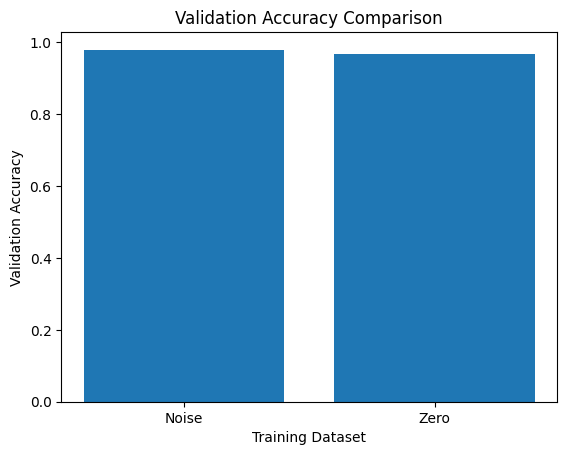

In [ ]:
plt.bar(['Noise', 'Zero'], [acc_noise, acc_zero])
plt.title('Validation Accuracy Comparison')
plt.xlabel('Training Dataset')
plt.ylabel('Validation Accuracy')
plt.show()

**3B. Fitting a MNIST model with randomly shuffled labels** [5 Marks]

In [ ]:
### Random shuffle here
(x_train, y_train), (x_test, y_test) = mnist.load_data()

np.random.shuffle(y_train)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(10, activation='softmax')
])
### Compile and Fit Model using above code
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test))

_, acc_shuffled = model.evaluate(x_test, y_test)
model.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test))

_, acc_correct = model.evaluate(x_test, y_test)

Epoch 1/2
1875/1875 [==============================] - 22s 12ms/step - loss: 3.3588 - accuracy: 0.1048 - val_loss: 2.3044 - val_accuracy: 0.1109
Epoch 2/2
313/313 [==============================] - 1s 4ms/step - loss: 2.3036 - accuracy: 0.1203
Epoch 1/2
1875/1875 [==============================] - 23s 12ms/step - loss: 2.2926 - accuracy: 0.1183 - val_loss: 2.3068 - val_accuracy: 0.1112
Epoch 2/2
313/313 [==============================] - 1s 4ms/step - loss: 2.3086 - accuracy: 0.1123


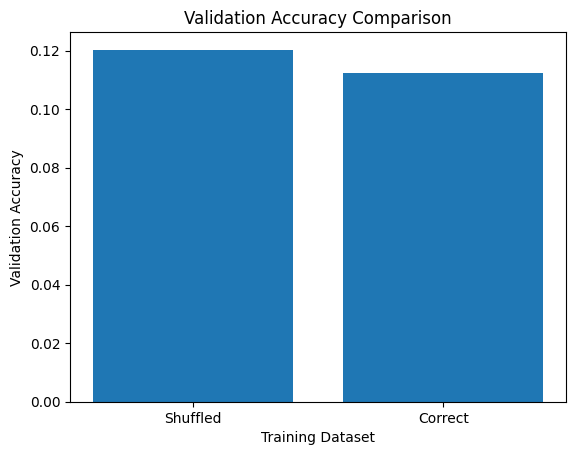

In [ ]:
plt.bar(['Shuffled', 'Correct'], [acc_shuffled, acc_correct])
plt.title('Validation Accuracy Comparison')
plt.xlabel('Training Dataset')
plt.ylabel('Validation Accuracy')
plt.show()


**3C.** [3+2 Marks]


**1. Improve the capacity of model using more appropriate learning rate and not more than 3 dense layers with rmsprop parameter or better of your choice.**

**2. Train the model and show the accuracy again.**

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 784)  # Flatten the input data
X_test = X_test.reshape(X_test.shape[0], 784)  # Flatten the input data

model = Sequential([
    layers.Dense(64, activation='relu', input_shape=(784,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # Corrected loss and metrics

model.fit(X_train, y_train, epochs=2, batch_size=64, validation_data=(X_test, y_test))

result = model.evaluate(X_test, y_test, batch_size=64)
print('Test loss:', result[0])
print('Test accuracy:', result[1])

Epoch 1/2
938/938 [==============================] - 4s 4ms/step - loss: 1.8081 - accuracy: 0.7964 - val_loss: 0.5334 - val_accuracy: 0.8860
Epoch 2/2
157/157 [==============================] - 0s 2ms/step - loss: 0.4225 - accuracy: 0.9148
Test loss: 0.42245396971702576
Test accuracy: 0.9147999882698059


# Question 04: Improve the Generalization [5 Marks]


You can improve the generalization of the trained model using following features

1. Dataset curation
2. Feature engineering
3. Using early stopping
4. Regularizing your model
5. Reducing the network's size

You are provided wit original Trained model, you have to improve the generalization of trained model on IMDB dataset through DROPOUT method (step 05- Reducing network size) and train the model again to show the Improved generalized Accuracy.


**Original Model**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 4s 96ms/step - loss: 0.6109 - accuracy: 0.6655 - val_loss: 0.5068 - val_accuracy: 0.8529
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.4183 - accuracy: 0.8736 - val_loss: 0.3892 - val_accuracy: 0.8509
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3002 - accuracy: 0.9057 - val_loss: 0.3134 - val_accuracy: 0.8858
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2356 - accuracy: 0.9233 - val_loss: 0.2879 - val_accuracy: 0.8896
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1944 - accuracy: 0.9357 - val_loss: 0.2940 - val_accuracy: 0.8817
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1628 - accuracy: 0.9480 - val_loss: 0.2808 - val_accuracy: 0.8876
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1385 - accurac

In [ ]:
### Write your Code here